## DNN을 이용한 와인 등급 분류

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import numpy as np
import pandas as pd

redwine = pd.read_csv("winequality-red.csv", sep=";")
X, y = redwine.iloc[:, :-1], redwine.iloc[:, -1]

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y,
                    batch_size=200, epochs=300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2394 - loss: 2.1112
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4332 - loss: 1.4291 
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4524 - loss: 1.2939 
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4589 - loss: 1.3092 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4598 - loss: 1.2527 
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4750 - loss: 1.1922 
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4811 - loss: 1.1924 
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4660 - loss: 1.2213 
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4730 - loss: 1.2062 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4608 - loss: 1.1988 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4985 - loss: 1.1496 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss

In [2]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(loss, accuracy)

0.977449893951416 0.6000000238418579


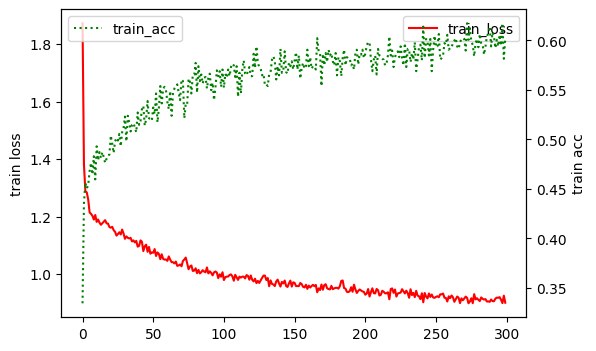

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history['loss'], 'r-', label="train_loss")
ax1.set_ylabel("train loss")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'],'g:',label="train_acc")
ax2.set_ylabel("train acc")
ax2.legend()
plt.show()